In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Model

In [105]:
#function y = w(x) + b
#Function y= 2(x) + 2
true_w = 2
true_b = 2
examples = 1000
w_true = 2.0
b_true = 2.0


xs = tf.random.normal(shape=[examples])
ys = (true_w * xs) + true_b


In [106]:
class Model(object):
  def __init__(self):
    self.w = tf.Variable(0.0)
    self.b = tf.Variable(1.0)
  def __call__(self,x):
    return (self.w * x) + self.b
model = Model()

In [107]:
def loss(predicted_y,target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))


In [108]:
def train(model,inputs,outputs,learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss(model(inputs),outputs)
  dw,db = tape.gradient(current_loss,[model.w,model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss





In [123]:
model = Model()

list_w, list_b = [], []
epochs = range(100)
lr = 0.1
losses = []
for epoch in epochs:
  list_w.append(model.b.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model,xs,ys,lr)
  losses.append(current_loss)
  print(f"Epoch: {epoch} w: {round(list_w[-1], 2)} b: {round(list_b[-1], 2)} loss: {losses[-1]}")


Epoch: 0 w: 1.0 b: 1.0 loss: 4.607217788696289
Epoch: 1 w: 1.2000000476837158 b: 1.2000000476837158 loss: 3.062887668609619
Epoch: 2 w: 1.3600000143051147 b: 1.3600000143051147 loss: 2.037170648574829
Epoch: 3 w: 1.4900000095367432 b: 1.4900000095367432 loss: 1.3555716276168823
Epoch: 4 w: 1.590000033378601 b: 1.590000033378601 loss: 0.9024243354797363
Epoch: 5 w: 1.6799999475479126 b: 1.6799999475479126 loss: 0.601017415523529
Epoch: 6 w: 1.7400000095367432 b: 1.7400000095367432 loss: 0.4004477262496948
Epoch: 7 w: 1.7899999618530273 b: 1.7899999618530273 loss: 0.2669202983379364
Epoch: 8 w: 1.840000033378601 b: 1.840000033378601 loss: 0.17798741161823273
Epoch: 9 w: 1.8700000047683716 b: 1.8700000047683716 loss: 0.11873079836368561
Epoch: 10 w: 1.899999976158142 b: 1.899999976158142 loss: 0.07923158258199692
Epoch: 11 w: 1.9199999570846558 b: 1.9199999570846558 loss: 0.05289189890027046
Epoch: 12 w: 1.9299999475479126 b: 1.9299999475479126 loss: 0.035320814698934555
Epoch: 13 w: 1.95

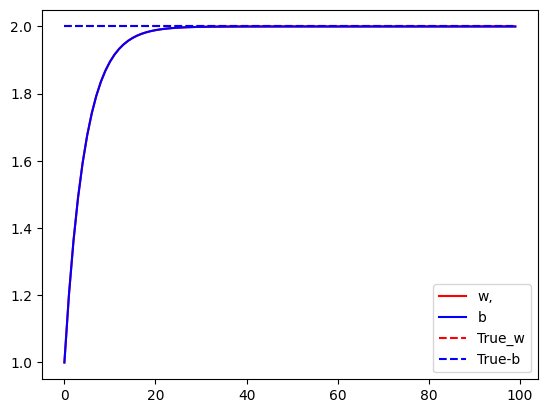

In [124]:
plt.plot(epochs,list_w,'r',epochs,list_b,'b')
plt.plot([w_true] * len(epochs),'r--',[b_true] * len(epochs),'b--')
plt.legend(['w,','b','True_w','True-b'])
plt.show()

In [125]:
def plot_data(inputs,ouputs,predicted_ouputs):
  plt.scatter(inputs,ouputs,c='b')
  plt.scatter(inputs,predicted_ouputs,c='r')
  plt.legend(['X','Y_True','X','Y_hat'])
  plt.show()

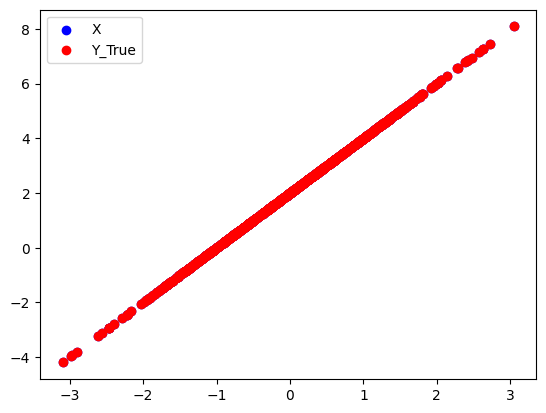

In [126]:
test_inputs = tf.random.normal(shape = [examples])
test_outputs = (test_inputs * w_true) + b_true

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs,test_outputs,predicted_test_outputs)